In [1]:
import pkg_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
import psifr.transitions as tr
import importlib
data_file = pkg_resources.resource_filename('psifr', 'data/Morton2013.csv')

In [2]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, 
                      list_keys=['list_type', 'list_category'], 
                      study_keys=['category'])

In [50]:
data.groupby(['subject', 'list'])['repeat'].sum().unstack(level='subject').loc[:, 1]

list
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     2
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    2
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    1
38    0
39    0
40    1
41    0
42    1
43    0
44    0
45    0
46    0
47    0
48    0
Name: 1, dtype: int64

In [51]:
list1 = data.loc[(data['subject'] == 1) & (data['list'] == 1)]
rec1 = list1.sort_values('output')
rec1

,subject,list,item,input,output,recalled,repeat,intrusion,list_type,list_category,category,_from_mask,_to_mask
24,1,1,CHAIN,24.0,1.0,True,0,False,pure,obj,obj,True,True
22,1,1,SMART CAR,22.0,2.0,True,0,False,pure,obj,obj,True,True
17,1,1,BAYONET,17.0,3.0,True,0,False,pure,obj,obj,True,True
20,1,1,WATCH,20.0,4.0,True,0,False,pure,obj,obj,True,True
16,1,1,CAR SEAT,16.0,5.0,True,0,False,pure,obj,obj,True,True
21,1,1,PILL,21.0,6.0,True,0,False,pure,obj,obj,True,True
5,1,1,JACKHAMMER,6.0,7.0,True,0,False,pure,obj,obj,True,True
19,1,1,STONE,19.0,8.0,True,0,False,pure,obj,obj,True,True
8,1,1,SHOVEL,9.0,9.0,True,0,False,pure,obj,obj,True,True
4,1,1,BACKPACK,5.0,10.0,True,0,False,pure,obj,obj,True,True


In [52]:
outputs = rec1['input'].to_numpy()
n_recall = rec1['output'].max()
from_mask = ((rec1['repeat'] == 0) & ~rec1['intrusion']).to_numpy()
to_mask = from_mask
op = rec1['output'].to_numpy()
category = rec1['category'].to_numpy()

In [63]:
importlib.reload(tr)
print(to_mask)
print(outputs)
print(outputs[to_mask])
print()
for prev, curr, poss in tr.transitions_masker(outputs, n_recall, from_mask, to_mask,
                                              category, lambda x, y: x == y):
    #print(curr - prev)
    print(poss - prev)
    #print(int(prev), poss)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True]
[24. 22. 17. 20. 16. 21.  6. 19.  9.  5.  8. 14.  1. 24. 18. 12. 13.  4.
  9.  2.  3.  7. 10. 11. 15. 23.]
[24. 22. 17. 20. 16. 21.  6. 19.  9.  5.  8. 14.  1. 18. 12. 13.  4.  2.
  3.  7. 10. 11. 15. 23.]

[ -2.  -7.  -4.  -8.  -3. -18.  -5. -15. -19. -16. -10. -23.  -6. -12.
 -11. -20. -22. -21. -17. -14. -13.  -9.  -1.]
[ -5.  -2.  -6.  -1. -16.  -3. -13. -17. -14.  -8. -21.  -4. -10.  -9.
 -18. -20. -19. -15. -12. -11.  -7.   1.]
[  3.  -1.   4. -11.   2.  -8. -12.  -9.  -3. -16.   1.  -5.  -4. -13.
 -15. -14. -10.  -7.  -6.  -2.   6.]
[ -4.   1. -14.  -1. -11. -15. -12.  -6. -19.  -2.  -8.  -7. -16. -18.
 -17. -13. -10.  -9.  -5.   3.]
[  5. -10.   3.  -7. -11.  -8.  -2. -15.   2.  -4.  -3. -12. -14. -13.
  -9.  -6.  -5.  -1.   7.]
[-15.  -2. -12. -16. -13.  -7. -20.  -3.  -9.  -8. -17. -19. -18. -14.
 -11. -10.  -6.   2.]


In [64]:
subj = data.query("subject == 1").sort_values('output')
list_recalls = [rec['input'].to_numpy() for name, rec in subj.groupby('list')]
n_recall = subj.groupby('list')['output'].max().to_numpy()
mask = [((rec['repeat'] == 0) & ~rec['intrusion']).to_numpy()
        for name, rec in subj.groupby('list')]
from_mask = mask
to_mask = mask
list_length = subj['input'].max()

In [65]:
list_actual = []
list_possible = []
for i, recalls in enumerate(list_recalls):
    masker = tr.transitions_masker(recalls, n_recall[i], from_mask[i], to_mask[i])
    for prev, curr, poss in masker:
        list_actual.append(curr - prev)
        list_possible.extend(poss - prev)
lags = np.arange(-list_length + 1, list_length + 1)
actual = np.histogram(list_actual, lags)[0]
possible = np.histogram(list_possible, lags)[0]

In [66]:
importlib.reload(fr)
actual, possible = tr.count_lags(list_recalls, list_length, 
                                 n_recall, from_mask, to_mask)

In [67]:
possible

-23.0     48
-22.0     84
-21.0    114
-20.0    125
-19.0    139
-18.0    164
-17.0    178
-16.0    191
-15.0    221
-14.0    231
-13.0    247
-12.0    264
-11.0    267
-10.0    274
-9.0     293
-8.0     311
-7.0     319
-6.0     335
-5.0     354
-4.0     355
-3.0     372
-2.0     395
-1.0     407
 0.0       0
 1.0     299
 2.0     293
 3.0     283
 4.0     275
 5.0     257
 6.0     242
 7.0     218
 8.0     208
 9.0     181
 10.0    183
 11.0    170
 12.0    148
 13.0    128
 14.0    122
 15.0    102
 16.0     95
 17.0     74
 18.0     64
 19.0     51
 20.0     36
 21.0     13
 22.0      3
 23.0      0
dtype: int64

In [103]:
%%time
importlib.reload(tr)
crp = fr.lag_crp(list1, 
                 from_mask=lambda df: ((df['repeat'] == 0) 
                                           & ~df['intrusion'] 
                                           & (df['output'] > 3)),
                 to_mask=lambda df: ((df['repeat'] == 0) 
                                         & ~df['intrusion']))

> /Users/morton/PycharmProjects/psifr/psifr/transitions.py(145)count_lags()
-> return actual, possible


(Pdb)  l


140  	    lags = np.arange(-list_length + 1, list_length + 1)
141  	    actual = pd.Series(np.histogram(list_actual, lags)[0], index=lags[:-1])
142  	    possible = pd.Series(np.histogram(list_possible, lags)[0], index=lags[:-1])
143  	    import pdb
144  	    pdb.set_trace()
145  ->	    return actual, possible
[EOF]


(Pdb)  p actual


-23    0
-22    0
-21    0
-20    0
-19    0
-18    0
-17    0
-16    0
-15    0
-14    0
-13    1
-12    0
-11    0
-10    0
-9     1
-8     3
-7     0
-6     0
-5     0
-4     0
-3     0
-2     0
-1     0
 0     0
 1     0
 2     0
 3     0
 4     2
 5     0
 6     1
 7     0
 8     0
 9     1
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    1
 19    0
 20    0
 21    0
 22    0
 23    0
dtype: int64


(Pdb)  p possible


-23     0
-22     1
-21     1
-20     1
-19     1
-18     3
-17     3
-16     4
-15     4
-14     5
-13     6
-12     6
-11     6
-10     6
-9      7
-8      8
-7      8
-6      7
-5      6
-4      9
-3      8
-2      7
-1      5
 0     10
 1      8
 2      6
 3      4
 4      7
 5      7
 6      5
 7      3
 8      3
 9      4
 10     3
 11     2
 12     1
 13     3
 14     2
 15     1
 16     0
 17     0
 18     1
 19     1
 20     1
 21     0
 22     1
 23     0
dtype: int64


(Pdb)  p output


array([24., 22., 18., 17., 23., 10.,  1., 19., 11., 15.,  7., 16., 20.,
       12., nan, 24.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 13., 14., 21.])


(Pdb)  p output[from_mask[0]]


array([17., 23., 10.,  1., 19., 11., 15.,  7., 16., 20., 12.])


(Pdb)  q


BdbQuit: 

In [99]:
crp.loc[1]

,prob,actual,possible
lag,,,
-23,0.000000,0,1
-22,0.200000,1,5
-21,0.000000,0,21
-20,0.035714,1,28
-19,0.026316,1,38
-18,0.015873,1,63
-17,0.075949,6,79
-16,0.021978,2,91
-15,0.072727,8,110


In [94]:
importlib.reload(fr)
#list1 = list1.drop(columns=['_from_mask', '_to_mask'])
list1 = data.loc[(data['subject'] == 1) & (data['list'] == 37)].copy()
if '_from_mask' in list1.columns:
    list1 = list1.drop(columns='_from_mask')
masked, from_key = fr.set_mask_column(list1, 'recalled', '_from_mask', 
                                      lambda df: ~df['intrusion'])
print(from_key)
masked

recalled


,subject,list,item,input,output,recalled,repeat,intrusion,list_type,list_category,category,_to_mask,_cat
880,1,37,LAWN MOWER,1.0,7.0,True,0,False,pure,obj,obj,True,obj
881,1,37,HANDCUFFS,2.0,NaN,False,0,False,pure,obj,obj,True,obj
882,1,37,CAMERA,3.0,NaN,False,0,False,pure,obj,obj,True,obj
883,1,37,GLASS,4.0,NaN,False,0,False,pure,obj,obj,True,obj
884,1,37,SAUCEPAN,5.0,NaN,False,0,False,pure,obj,obj,True,obj
885,1,37,CACTUS,6.0,NaN,False,0,False,pure,obj,obj,True,obj
886,1,37,KEYS,7.0,11.0,True,0,False,pure,obj,obj,True,obj
887,1,37,PIE,8.0,NaN,False,0,False,pure,obj,obj,True,obj
888,1,37,CANDLE,9.0,NaN,False,0,False,pure,obj,obj,True,obj
889,1,37,DRESSER,10.0,6.0,True,0,False,pure,obj,obj,True,obj


In [77]:
%%timeit
data.loc[:, '_cat'] = data['category']

1.16 ms ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [81]:
callable(None)

False

In [78]:
%%timeit
data['category']

1.77 µs ± 6.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


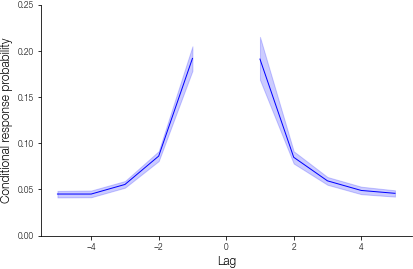

In [75]:
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('-5 <= lag < 0').reset_index())
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('5 >= lag > 0').reset_index())
g.set_xlabel('Lag');
g.set_ylabel('Conditional response probability');
g.set_ylim(0, .25);

In [43]:
lags = np.arange(-list_length + 1, list_length + 1)
crp = pd.DataFrame({'actual': actual, 'possible': possible, 
                    'prob': actual / possible}, index=lags[:-1])
crp

<ipython-input-43-88eaefc71762>:3: RuntimeWarning: invalid value encountered in true_divide
  'prob': actual / possible}, index=lags[:-1])


,actual,possible,prob
-23.0,1,48,0.020833
-22.0,3,84,0.035714
-21.0,3,114,0.026316
-20.0,3,125,0.024000
-19.0,2,139,0.014388
-18.0,2,164,0.012195
-17.0,8,178,0.044944
-16.0,3,191,0.015707
-15.0,11,221,0.049774
-14.0,5,231,0.021645
